In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [7]:
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0])

In [8]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

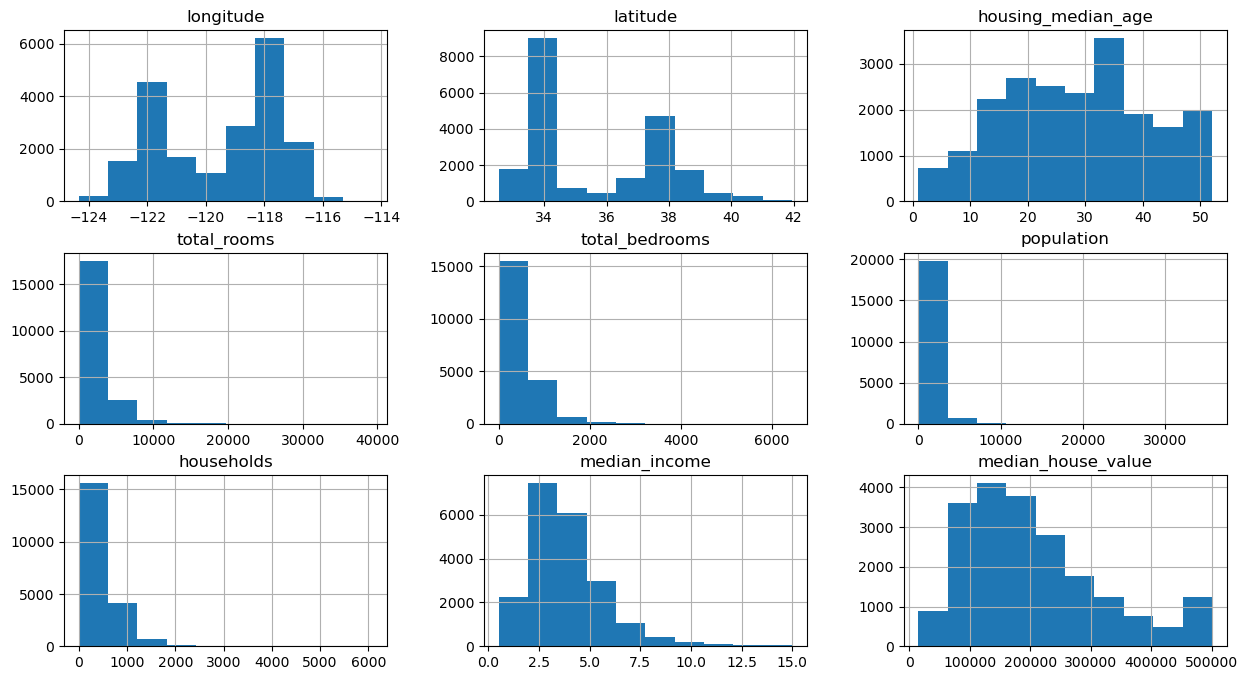

In [9]:
data.hist(figsize=(15,8))

C:\Users\kavin\AppData\Local\Temp\ipykernel_1176\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

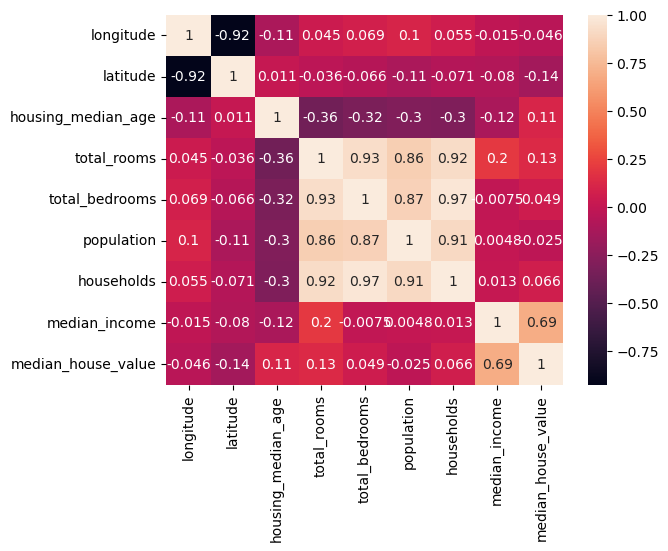

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
lis=['total_rooms','total_bedrooms','population','households']
for col in lis:
    data[col]=np.log(data[col])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

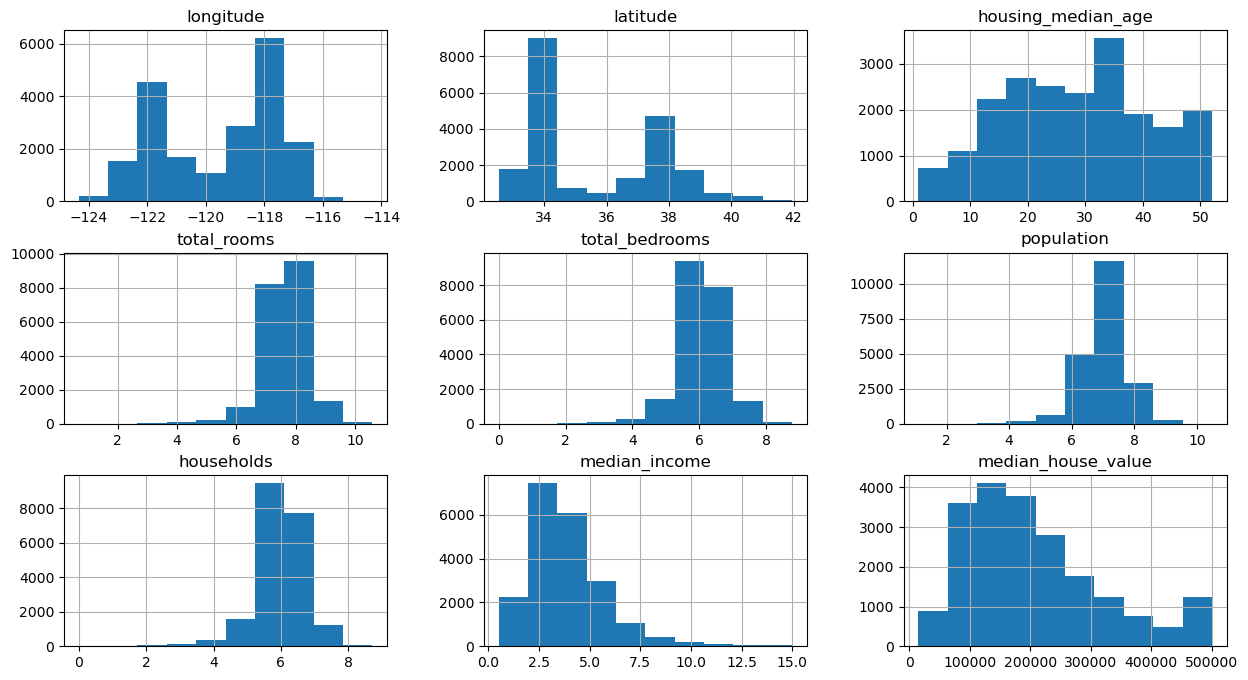

In [12]:
data.hist(figsize=(15,8))

In [13]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
data= data.join(pd.get_dummies(data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,0,1,0,0,0


<Axes: >

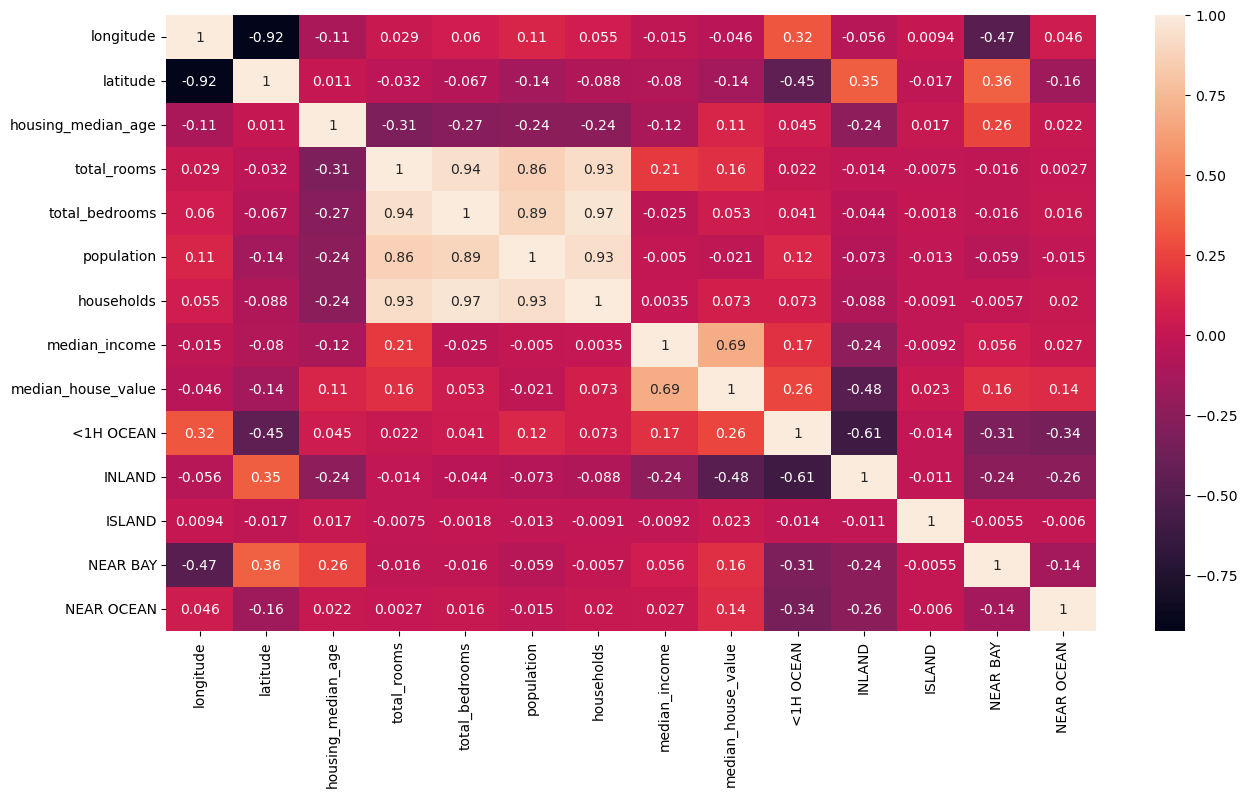

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

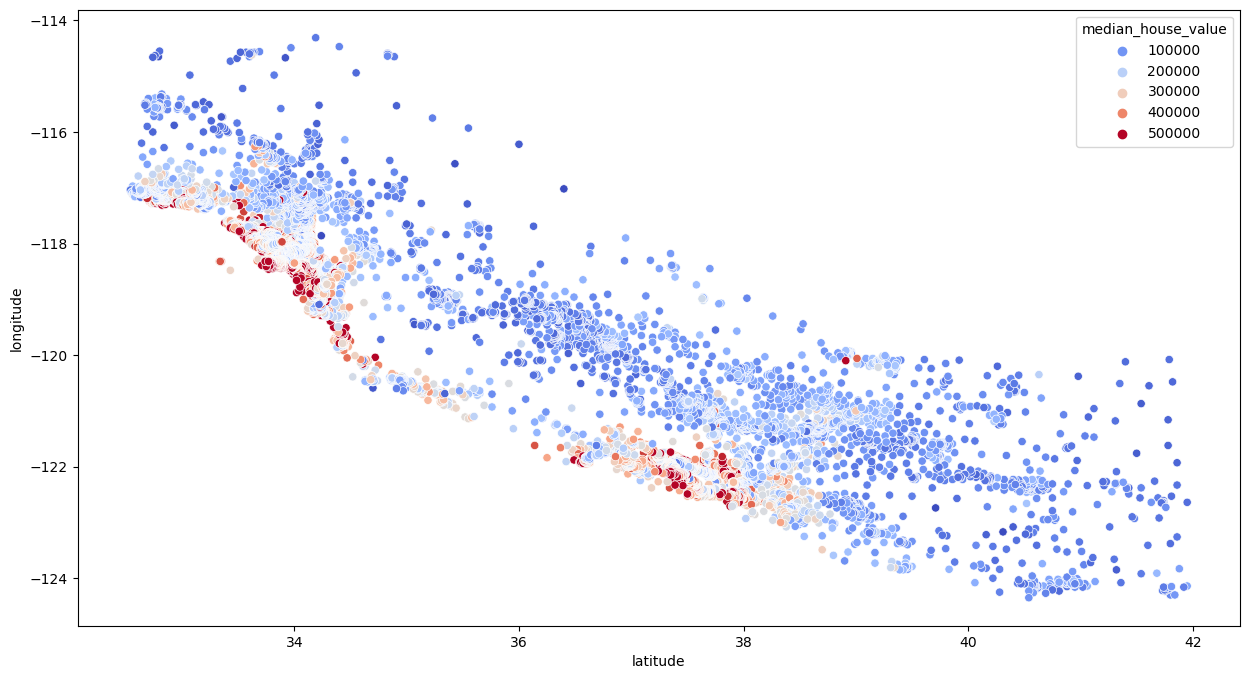

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=data,hue='median_house_value',palette='coolwarm')

In [18]:
 data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [19]:
data['room_ratio']=data['total_bedrooms']/data['total_rooms']

In [20]:
data['Household_rooms']=data['total_rooms']/data['households']

<Axes: >

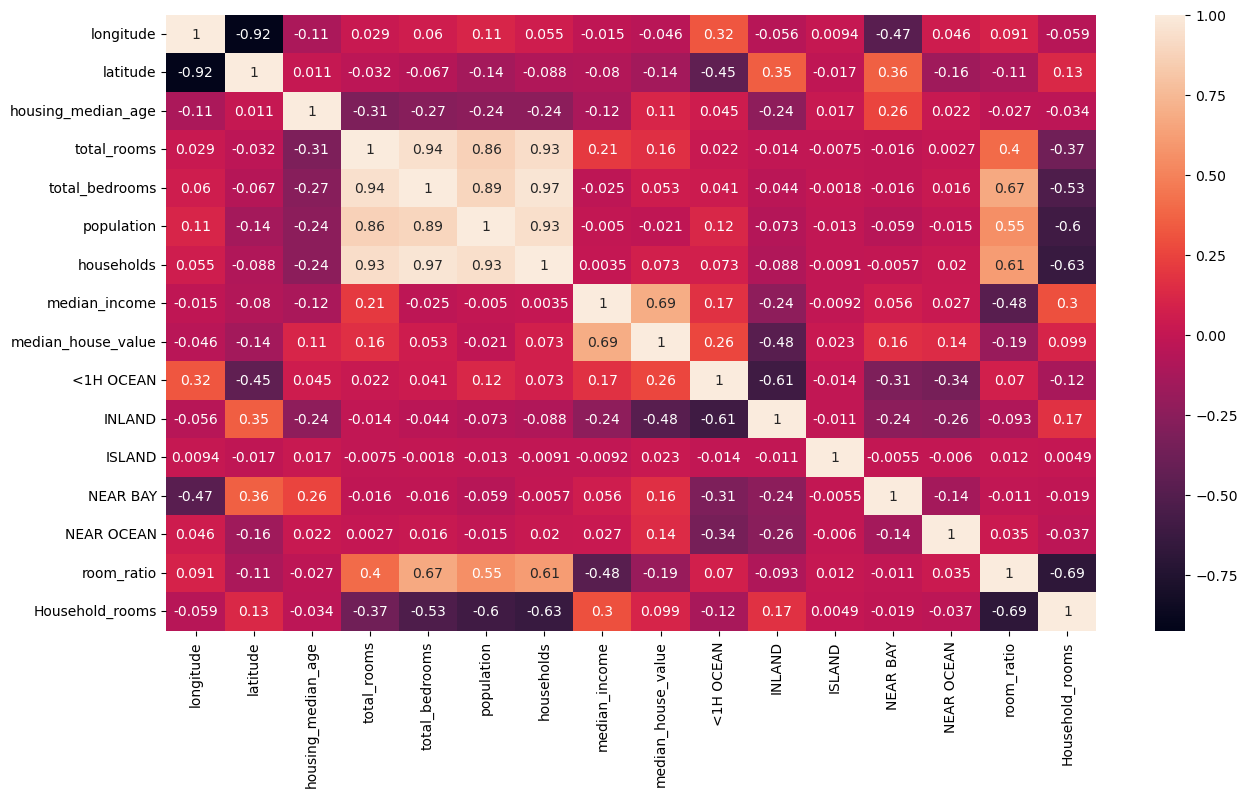

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [22]:
x=data.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,14]].values
y=data.iloc[:,8].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
ypred=lr.predict(x_test)

In [25]:
di=pd.DataFrame({'Ac':y_test,'Pred':ypred})

In [26]:
di

,Ac,Pred
0,136900.0,197886.458653
1,241300.0,282232.989557
2,200700.0,177512.310072
3,72500.0,98499.673985
4,460000.0,324001.285350
...,...,...
4123,169500.0,173618.321320
4124,204600.0,242303.584701
4125,128600.0,91998.773450
4126,259500.0,255190.775975


In [27]:
from sklearn.metrics import r2_score,mean_squared_error as mse
print(r2_score(y_test,ypred))
print(mse(y_test,ypred))

0.6600999939360233
4432142792.039451


In [28]:
#different RFR

In [1]:
from  sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor(n_estimators=100,random_state=0)
Rfr.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [30]:
ypred=Rfr.predict(x_test)
di=pd.DataFrame({'Ac':y_test,'Pred':ypred})
di

,Ac,Pred
0,136900.0,150600.0
1,241300.0,248570.0
2,200700.0,147790.0
3,72500.0,70420.0
4,460000.0,360610.0
...,...,...
4123,169500.0,162600.0
4124,204600.0,194770.0
4125,128600.0,163900.0
4126,259500.0,217470.0


In [31]:
print(r2_score(y_test,ypred))
print(mse(y_test,ypred))

0.8009215284464126
2595893489.2763324
